# **Imports**

In [1]:
# upgrade matplotlib for bar_label which is available in matplotlib version 3.5.1
!pip install --upgrade matplotlib

import numpy as np
import pandas as pd
import string
import matplotlib
import matplotlib.pyplot as plt
import json

import nltk
nltk.download('brown')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import brown
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet as wn

# Define constants
# Get the punctuation list using string package
punctuations = list(string.punctuation)
punctuations.append('``')
punctuations.append('--')
punctuations.append("''")

# Get english stopwords from nltk.corpus
# code from https://stackoverflow.com/questions/28339622/is-there-a-corpora-of-english-words-in-nltk
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Activity 3**

## **3.1 Sub-activity: Loading the Brown corpus data from NLTK**

### **Task 1**

In [2]:
# Print all categories of the brown corpus in alphabetical order
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


### **Task 2**

In [3]:
# Build a dataframe for brown_corpus
brown_corpus = pd.DataFrame(columns=['category_name', 'count_words', 'count_sentences', 'count_paragraphs', 'common_words'])

# (a), (b) Add five columns to the dataframe
for i in range(len(brown.categories())):
  brown_corpus.loc[i, 'category_name'] = brown.categories()[i]
  brown_corpus.loc[i, 'count_words'] = len(brown.words(categories=brown.categories()[i]))
  brown_corpus.loc[i, 'count_sentences'] = len(brown.sents(categories=brown.categories()[i]))
  brown_corpus.loc[i, 'count_paragraphs'] = len(brown.paras(categories=brown.categories()[i]))
  # Add the ten most frequently occurring words in each category
  brown_corpus.loc[i, 'common_words'] = [y[0] for y in FreqDist(x.lower() for x in brown.words(categories=brown.categories()[i])).most_common()[:10]]

# (c) Add new column in the dataframe for the common words after removing stopwords and punctuation 
brown_corpus['common_words_after_preprocessing'] = ""

# Remove stopwords and punctuation
# code from https://stackoverflow.com/questions/28392860/print-10-most-frequently-occurring-words-of-a-text-that-including-and-excluding
for i in range(len(brown.categories())):
  without_punc = [i.strip("".join(punctuations)) for i in brown.words(categories=brown.categories()[i]) if i not in punctuations]
  without_punc = [i for i in without_punc if i]
  brown_corpus.loc[i, 'common_words_after_preprocessing'] = [y[0] for y in FreqDist(x.lower() for x in without_punc if x.lower() not in stopwords).most_common()[:10]]

# (d) Print the first ten rows of the dataframe
brown_corpus.head(10)

,category_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing
0,adventure,69342,4637,1387,"[., the, ,, and, a, of, to, he, ``, '']","[said, would, one, back, man, could, like, tim..."
1,belles_lettres,173096,7209,1405,"[the, ,, ., of, and, to, a, in, that, is]","[one, would, new, time, man, even, may, could,..."
2,editorial,61604,2997,1003,"[the, ,, ., of, to, and, a, in, is, that]","[would, one, new, mr, united, may, people, ame..."
3,fiction,68488,4249,1043,"[the, ,, ., and, to, of, a, he, was, in]","[would, said, one, could, like, man, back, tim..."
4,government,70117,3032,851,"[the, ,, of, ., and, to, in, a, for, is]","[state, states, year, may, united, new, one, d..."
5,hobbies,82345,4193,1119,"[the, ,, ., of, and, a, to, in, is, for]","[one, new, may, time, first, many, two, also, ..."
6,humor,21695,1053,254,"[,, the, ., and, a, of, to, in, ``, '']","[said, one, would, time, even, like, mr, could..."
7,learned,181888,7734,1418,"[the, ,, of, ., and, in, to, a, is, that]","[af, one, may, would, two, 1, first, also, tim..."
8,lore,110299,4881,1203,"[the, ,, ., of, and, to, a, in, is, that]","[one, would, time, may, new, first, could, peo..."
9,mystery,57169,3886,1164,"[., the, ,, to, and, a, he, of, was, ``]","[said, would, one, back, could, like, man, get..."


## **3.2 Sub-activity: Applying NLP operations on the corpus**

### **Task 3**

In [4]:
# (a) Remove punctuation
without_punc = [i.strip("".join(punctuations)) for i in brown.words(categories='news') if i not in punctuations]
without_punc = [i for i in without_punc if i]

# (a) Remove stopwords
news_words = [y for y in without_punc if y.lower() not in stopwords]

# (b) Print the number of unique words before stemming
print('The number of unique words in news after preprocessing:', len(set(news_words)))

# (c) Stem the words in category news with PorterStemmer and then print the number of unique words
stemmer = PorterStemmer()
single_news = [stemmer.stem(words) for words in news_words]
print('The number of unique words in news after stemming:', len(set(single_news)))

The number of unique words in news after preprocessing: 13987
The number of unique words in news after stemming: 9464


### **Task 4**

In [5]:
# (a) Remove punctuation
without_punc = [i.strip("".join(punctuations)) for i in brown.words(categories='fiction') if i not in punctuations]
without_punc = [i for i in without_punc if i]

# (a) Remove stopwords
fiction_words = [y for y in without_punc if y.lower() not in stopwords]

# (b) Print the number of unique words before stemming
print('The number of unique words in fiction after preprocessing:', len(np.unique(fiction_words)))

# (c) Stem the words in category fiction with PorterStemmer and then print the number of unique words
stemmer2 = SnowballStemmer("english", ignore_stopwords=True)
single_fiction = [stemmer2.stem(words) for words in fiction_words]
print('The number of unique words in fiction after stemming:', len(np.unique(single_fiction)))

The number of unique words in fiction after preprocessing: 9017
The number of unique words in fiction after stemming: 6122


### **Task 5**

In [6]:
# (a) Remove punctuation
without_punc = [i.strip("".join(punctuations)) for i in brown.words(categories='government') if i not in punctuations]
without_punc = [i for i in without_punc if i]

# (a) Remove stopwords
government_words = [y for y in without_punc if y.lower() not in stopwords]

# (b) Print the number of unique words before lemmatization
print('The number of unique words in government_words after preprocessing:', len(np.unique(government_words)))

# (c) Lemmatize the words in category government with WordNetLemmatizer and then print the number of unique words
lemmatizer = WordNetLemmatizer()
single_government = [lemmatizer.lemmatize(words) for words in government_words]
print('The number of unique words in government_words after lemmatizing:', len(np.unique(single_government)))

The number of unique words in government_words after preprocessing: 7894
The number of unique words in government_words after lemmatizing: 7150


### **Task 6**

In [7]:
# (a) Make two empty columns in the dataframe brown_corpus for synonyms and antonyms
# code from https://www.nltk.org/howto/wordnet.html
brown_corpus['synonyms'] = ""
brown_corpus['antonyms'] = ""

# (b) The function of get_synonyms is used to take a list of words and return its synonyms in a list
def get_synonyms(syn_list):

  # store synset of the each word in a list
  syn_sets = [wn.synsets(i) for i in syn_list]
  synonyms_set = []
  for i in syn_sets:
    if len(i) == 0:
      continue
    else:
      for j in i:
        for name in j.lemma_names():
          synonyms_set.append(name)
  return synonyms_set

# The function of get_antonyms is used to take a list of words and return its antonyms in a list
# code from https://stackoverflow.com/questions/47441518/how-to-get-a-list-of-antonyms-lemmas-using-python-nltk-and-wordnet
def get_antonyms(syn_list):
  syn_sets = [wn.synsets(i) for i in syn_list]
  antonyms_set = []
  for i in syn_sets:
    if len(i) == 0:
      continue
    else:
      for j in i:
        for a in j.lemmas():
          # check if antonyms exists
          if a.antonyms():
            antonyms_set.append(a.antonyms()[0].name())
  return antonyms_set

# (c) Apply the two function and save the results in brown_corpus dataframe
for i in range(len(brown.categories())):
  brown_corpus.loc[i, 'synonyms'] = get_synonyms(brown_corpus.loc[i, 'common_words_after_preprocessing'])
  brown_corpus.loc[i, 'antonyms'] = get_antonyms(brown_corpus.loc[i, 'common_words_after_preprocessing'])

# (d) Print the first ten rows of brown_corpus
brown_corpus.head(10)

,category_name,count_words,count_sentences,count_paragraphs,common_words,common_words_after_preprocessing,synonyms,antonyms
0,adventure,69342,4637,1387,"[., the, ,, and, a, of, to, he, ``, '']","[said, would, one, back, man, could, like, tim...","[state, say, tell, allege, aver, say, suppose,...","[front, front, advance, front, veer, front, fo..."
1,belles_lettres,173096,7209,1405,"[the, ,, ., of, and, to, a, in, that, is]","[one, would, new, time, man, even, may, could,...","[one, 1, I, ace, single, unity, one, one, 1, i...","[old, worn, woman, civilian, woman, odd, uneve..."
2,editorial,61604,2997,1003,"[the, ,, ., of, to, and, a, in, is, that]","[would, one, new, mr, united, may, people, ame...","[one, 1, I, ace, single, unity, one, one, 1, i...","[old, worn, divide, disunify, divided]"
3,fiction,68488,4249,1043,"[the, ,, ., and, to, of, a, he, was, in]","[would, said, one, could, like, man, back, tim...","[state, say, tell, allege, aver, say, suppose,...","[dislike, unlike, unlike, unalike, woman, civi..."
4,government,70117,3032,851,"[the, ,, of, ., and, to, in, a, for, is]","[state, states, year, may, united, new, one, d...","[state, province, state, state, state, nation,...","[divide, disunify, divided, old, worn, devolut..."
5,hobbies,82345,4193,1119,"[the, ,, ., of, and, a, to, in, is, for]","[one, new, may, time, first, many, two, also, ...","[one, 1, I, ace, single, unity, one, one, 1, i...","[old, worn, end, last, second, few, evil, evil..."
6,humor,21695,1053,254,"[,, the, ., and, a, of, to, in, ``, '']","[said, one, would, time, even, like, mr, could...","[state, say, tell, allege, aver, say, suppose,...","[odd, uneven, dislike, unlike, unlike, unalike]"
7,learned,181888,7734,1418,"[the, ,, of, ., and, in, to, a, is, that]","[af, one, may, would, two, 1, first, also, tim...","[one, 1, I, ace, single, unity, one, one, 1, i...","[end, last, second]"
8,lore,110299,4881,1203,"[the, ,, ., of, and, to, a, in, is, that]","[one, would, time, may, new, first, could, peo...","[one, 1, I, ace, single, unity, one, one, 1, i...","[old, worn, end, last, second, few]"
9,mystery,57169,3886,1164,"[., the, ,, to, and, a, he, of, was, ``]","[said, would, one, back, could, like, man, get...","[state, say, tell, allege, aver, say, suppose,...","[front, front, advance, front, veer, front, fo..."


### **Task 7**

In [8]:
# Make a bigram
# Select the last 500 paragraphs from the paragraph list of the Brown corpus
para_words = brown.paras()[-500:]

### **Task 8**

In [9]:
# Define the get_bigrams_frequency function
# The function take a nested list of words as input and use nltk.bigrams to find and calculate the bigram frequency
# The result is saved in a dictionary with the bigrams as key and frequencies as value
def get_bigrams_frequency(para):
  bigram_list = []
  for i in range(len(para)):
    for j in range(len(para[i])):

      # remove stopwords before make the bigram but keep the punctuations
      no_stopwords = [y for y in para[i][j] if y.lower() not in stopwords]
      bgs = list(nltk.bigrams(no_stopwords))
      for x in bgs:
        bigram_list.append(x)
  bgs_dist = dict(nltk.FreqDist(bigram_list))
  return bgs_dist

### **Task 9**

In [10]:
# Get the brown_bigrams
brown_bigrams = get_bigrams_frequency(para_words)

# Remove the bigrams which include any of punctuations
# code from https://stackoverflow.com/questions/57920423/how-to-remove-tuple-from-the-list-if-the-tuple-contains-punctuation-mark
brown_bigrams = {k: v for k, v in brown_bigrams.items() if not any(p in k for p in punctuations)}

### **Task 10**

In [11]:
# Sort the bigram
# code from https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
brown_bigrams = {k: v for k, v in sorted(brown_bigrams.items(), key=lambda item: item[1], reverse=True)}

# Print the 15 most frequently occurring bigrams
for x in list(brown_bigrams.keys())[:15]:
  print(x)

('years', 'ago')
('Mr.', 'Crombie')
('New', 'York')
('Mr.', 'Blatz')
('Mr.', 'Willis')
('Mr.', 'Gorboduc')
('Hanford', 'College')
('humor', 'comedy')
('next', 'morning')
('Mr.', 'Partlow')
('long', 'enough')
('General', 'Burnside')
('Phil', 'said')
('Frankie', 'said')
('Samuel', 'Burns')


## **3.3 Sub-section: Visualisation**

### **Task 11**

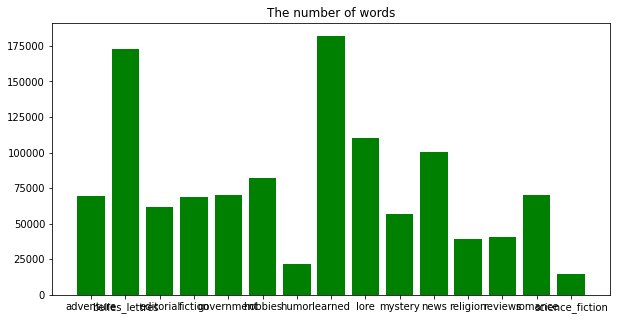

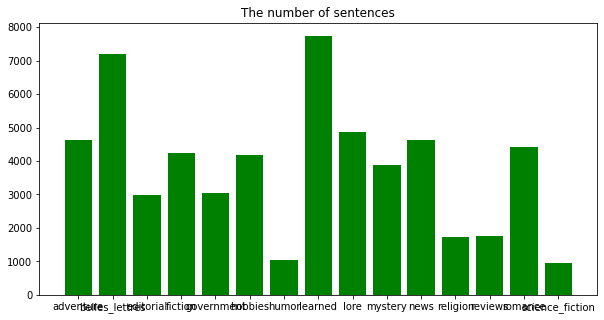

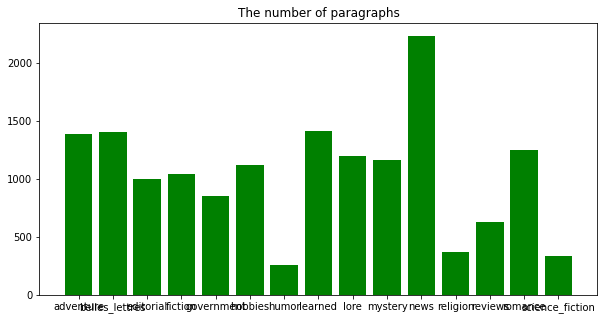

In [12]:
# Barplot for the number of words (per category)
fig = plt.figure(figsize = (10, 5))
plt.bar(brown_corpus['category_name'], brown_corpus['count_words'], color='green')
plt.title("The number of words")
plt.show()

# Barplot for number of sentences (per category)
fig = plt.figure(figsize = (10, 5))
plt.bar(brown_corpus['category_name'], brown_corpus['count_sentences'], color='green')
plt.title("The number of sentences")
plt.show()

# Barplot for the number of paragraphs (per category)
fig = plt.figure(figsize = (10, 5))
plt.bar(brown_corpus['category_name'], brown_corpus['count_paragraphs'], color='green')
plt.title("The number of paragraphs")
plt.show()

### **Task 12**

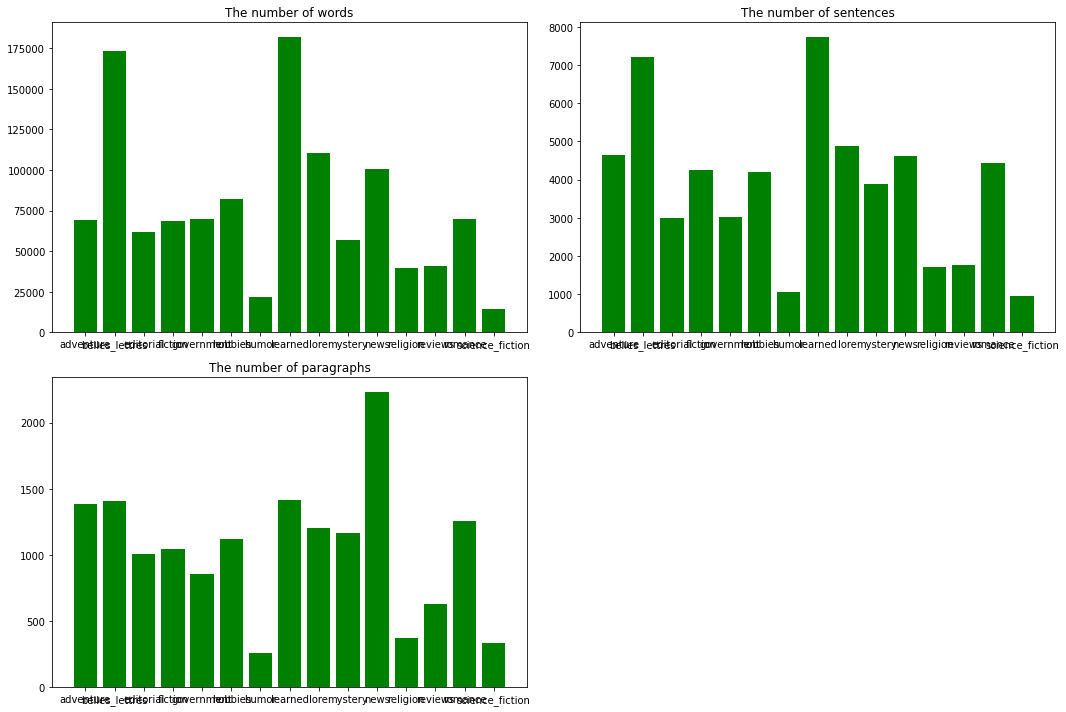

In [13]:
# Use subplot to display three plots in a single figure
# Barplot for the number of words (per category)
fig = plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
plt.bar(brown_corpus['category_name'], brown_corpus['count_words'], color='green')
plt.title("The number of words")

# Barplot for number of sentences (per category)
plt.subplot(2, 2, 2)
plt.bar(brown_corpus['category_name'], brown_corpus['count_sentences'], color='green')
plt.title("The number of sentences")

# Barplot for the number of paragraphs (per category)
plt.subplot(2, 2, 3)
plt.bar(brown_corpus['category_name'], brown_corpus['count_paragraphs'], color='green')
plt.title("The number of paragraphs")

plt.tight_layout()
plt.show()

### **Task 13**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


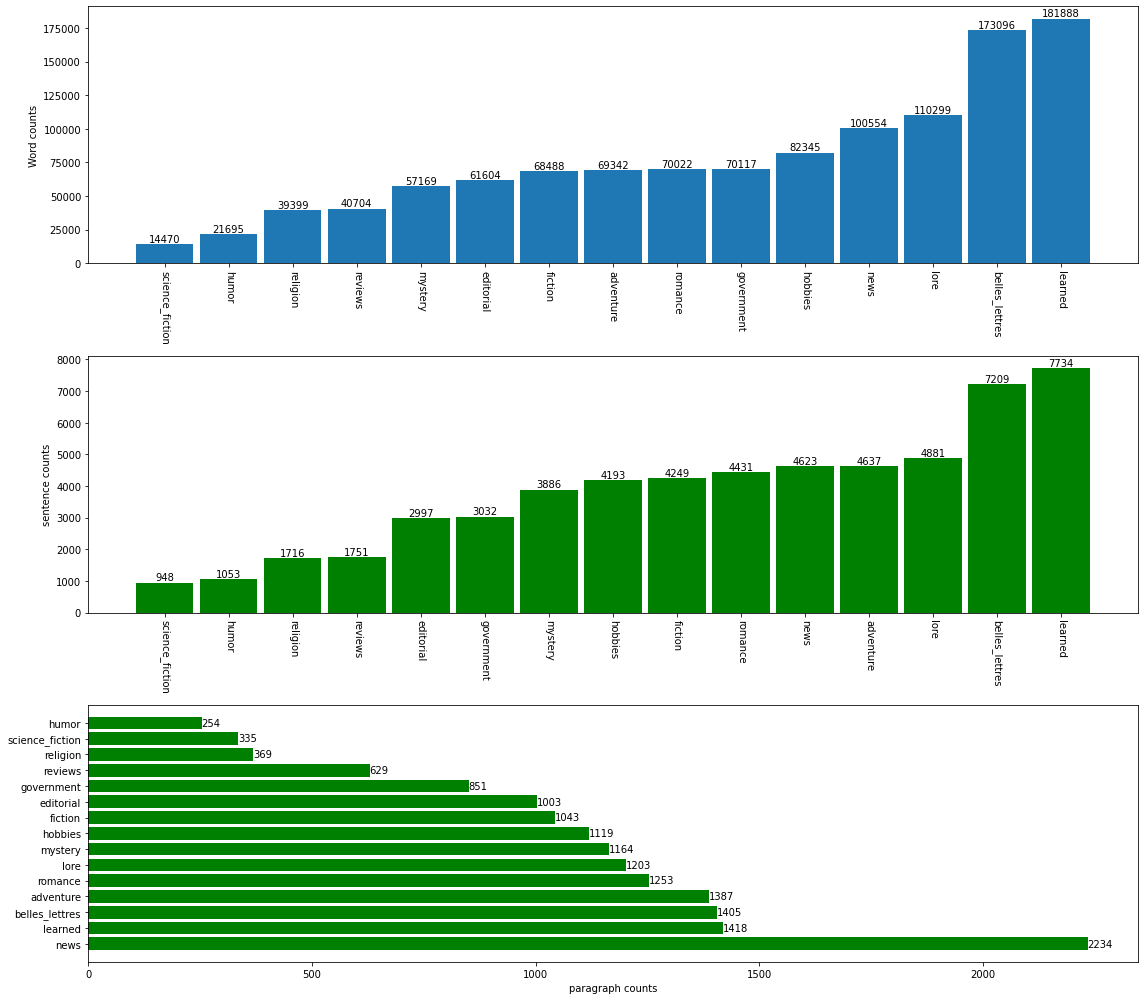

In [14]:
# Apply some changes to the barplots
# code from https://stackoverflow.com/questions/53066633/python-how-to-show-values-on-top-of-bar-plot
# bar_label is available in matplotlib version 3.5.1
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(16,14))

# Barplot for the number of words (per category)
# Sort the value in ascending order
sort_words = brown_corpus.sort_values('count_words')
# Use the default color "blue"
p1 = ax1.bar('category_name', 'count_words', data=sort_words, width=0.9)
ax1.set_ylabel('Word counts')
# Rotate the x-label by 90 degrees clockwise
ax1.set_xticklabels(sort_words['category_name'], rotation=-90)
# Add the exact count of words
ax1.bar_label(p1, label_type='edge')

# Barplot for number of sentences (per category)
# Sort the value in ascending order
sort_sentences = brown_corpus.sort_values('count_sentences')
p2 = ax2.bar('category_name', 'count_sentences', data=sort_sentences, color='green', width=0.9)
ax2.set_ylabel('sentence counts')
# Rotate the x-label by 90 degrees clockwise
ax2.set_xticklabels(sort_sentences['category_name'], rotation=-90)
# Add the exact count of sentence
ax2.bar_label(p2, label_type='edge')

# Barplot for the number of paragraphs (per category)
# Sort the value in ascending order
sort_paragraphs = brown_corpus.sort_values('count_paragraphs')
y_pos = np.arange(len(sort_words['category_name']))
# Change to horizontal barplot
p3 = ax3.barh(y_pos, sort_paragraphs['count_paragraphs'], color='green')
ax3.set_xlabel('paragraph counts')
ax3.set_yticks(y_pos, labels=sort_paragraphs['category_name'])
ax3.invert_yaxis()
# Add the exact count of paragraph
ax3.bar_label(p3, label_type='edge')

plt.tight_layout()
plt.show()

### **Task 14**

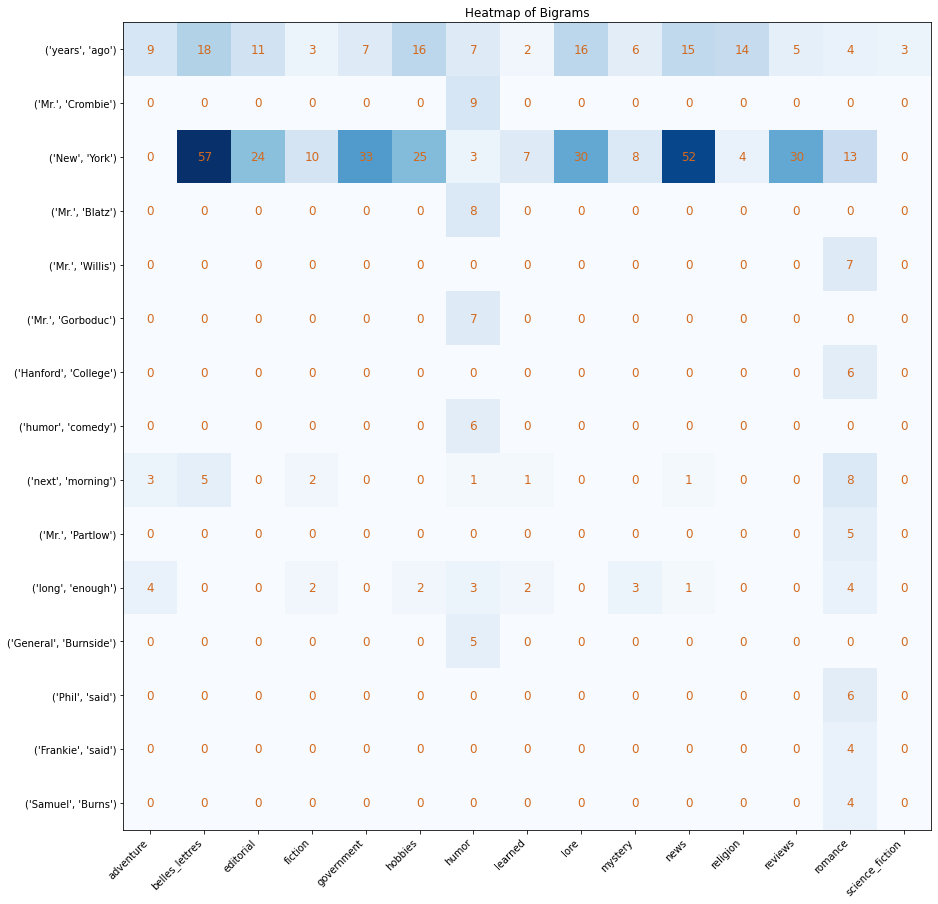

In [15]:
# the 15 most frequently occurring bigrams
most_15 = list(brown_bigrams.keys())[:15]

# The map_dict dictionary has the category name as the key and the value is a dictionary
# which contains the 15 most frequently occurring bigrams (most_15) and their frequency
map_dict = {}
for cate in brown.categories():
  para_words_ = brown.paras(categories=cate)

  bigram_list = []
  for i in range(len(para_words_)):
    for j in range(len(para_words_[i])):
      try:
        # Remove stopwords
        no_stopwords = [y for y in para_words_[i][j] if y.lower() not in stopwords]
        bgs = list(nltk.bigrams(no_stopwords))
        for x in bgs:
          bigram_list.append(x)
      except:
        continue
  bgs_dist = dict(nltk.FreqDist(bigram_list))

  bgs_dist15 = dict()
  for words in most_15:
    # Given a category, if the bigram is not in most_15, then give 0 for its frequency
    # Otherwise, use its owmn frequency
    if words not in list(bgs_dist.keys()):
      bgs_dist15[words] = 0
    else:
      bgs_dist15[words] = bgs_dist[words]
  map_dict[cate] = bgs_dist15

# Plot the heatmap for the bigram frequency
# y_axis
y = most_15

# x_axis
categories = brown.categories()

# Transform the map_dict into a matrix
bigram_map = []
for i in categories:
  bigram_by_categories = []
  for j in y:
    bigram_by_categories.append(map_dict[i][j])
  bigram_map.append(bigram_by_categories)

# Transpost
bigram_map = np.array(bigram_map).T

# code from https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
fig, ax = plt.subplots(figsize=(13,13))
im = ax.imshow(bigram_map, cmap='Blues')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(categories)))
ax.set_yticks(np.arange(len(y)))

ax.set_xticklabels(categories)
ax.set_yticklabels(y)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",va="top")

# Loop over data dimensions and create text annotations.
for i in range(len(y)):
    for j in range(len(categories)):
        text = ax.text(j, i, bigram_map[i, j],
                       ha="center", va="center", color="chocolate", size='large')

ax.set_title("Heatmap of Bigrams")
plt.tight_layout()
plt.show()